# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [55]:
# Code Here
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
import pandas as pd
penguins.head()
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [66]:
penguins = penguins.dropna()
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]

In [67]:
data =  []

In [68]:
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    #("poly", PolynomialFeatures(degree = 10), ["bill_length_mm"])
    ],
  remainder = "passthrough")

# ... (rest of the pipeline remains the same)

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)




In [69]:
rquared1= cross_val_score(lr_pipeline, X, y, cv = 5, scoring='r2').mean()

data.append({
    "Model": "1",
    "R2": rquared1
})

In [75]:
knn_pipeline = Pipeline(
    [
        ("preprocessing", ct),  # Use the same preprocessing steps as before
        ("knn", KNeighborsRegressor(n_neighbors=5))  # Replace with your desired K value
    ]
)

# Perform cross-validation for the kNN model
r21 = cross_val_score(knn_pipeline, X, y, cv=5, scoring='r2').mean()

data.append({
    "Model": "2",
    "R2": r21})

In [71]:
knn_pipeline2 = Pipeline(
    [
        ("preprocessing", ct),  # Use the same preprocessing steps as before
        ("knn", KNeighborsRegressor(n_neighbors=10))  # Replace with your desired K value
    ]
)

# Perform cross-validation for the kNN model
knn2 = cross_val_score(knn_pipeline2, X, y, cv=5, scoring='r2').mean()


data.append({
    "Model": "3",
    "R2": knn2})

In [72]:
tree_pipeline = Pipeline(
    [
        ("preprocessing", ct),  # Use the same preprocessing steps as before
        ("tree", DecisionTreeRegressor(random_state=42))  # Add any hyperparameters you want to tune
    ]
)

# Perform cross-validation for the Decision Tree model
tree = cross_val_score(tree_pipeline, X, y, cv=5, scoring='r2').mean()
data.append({
    "Model": "4",
    "R2": tree})


In [73]:
df = pd.DataFrame(data)
df

,Model,R2
0,1,0.394838
1,2,-1.179949
2,3,-1.070210
3,4,-0.137551


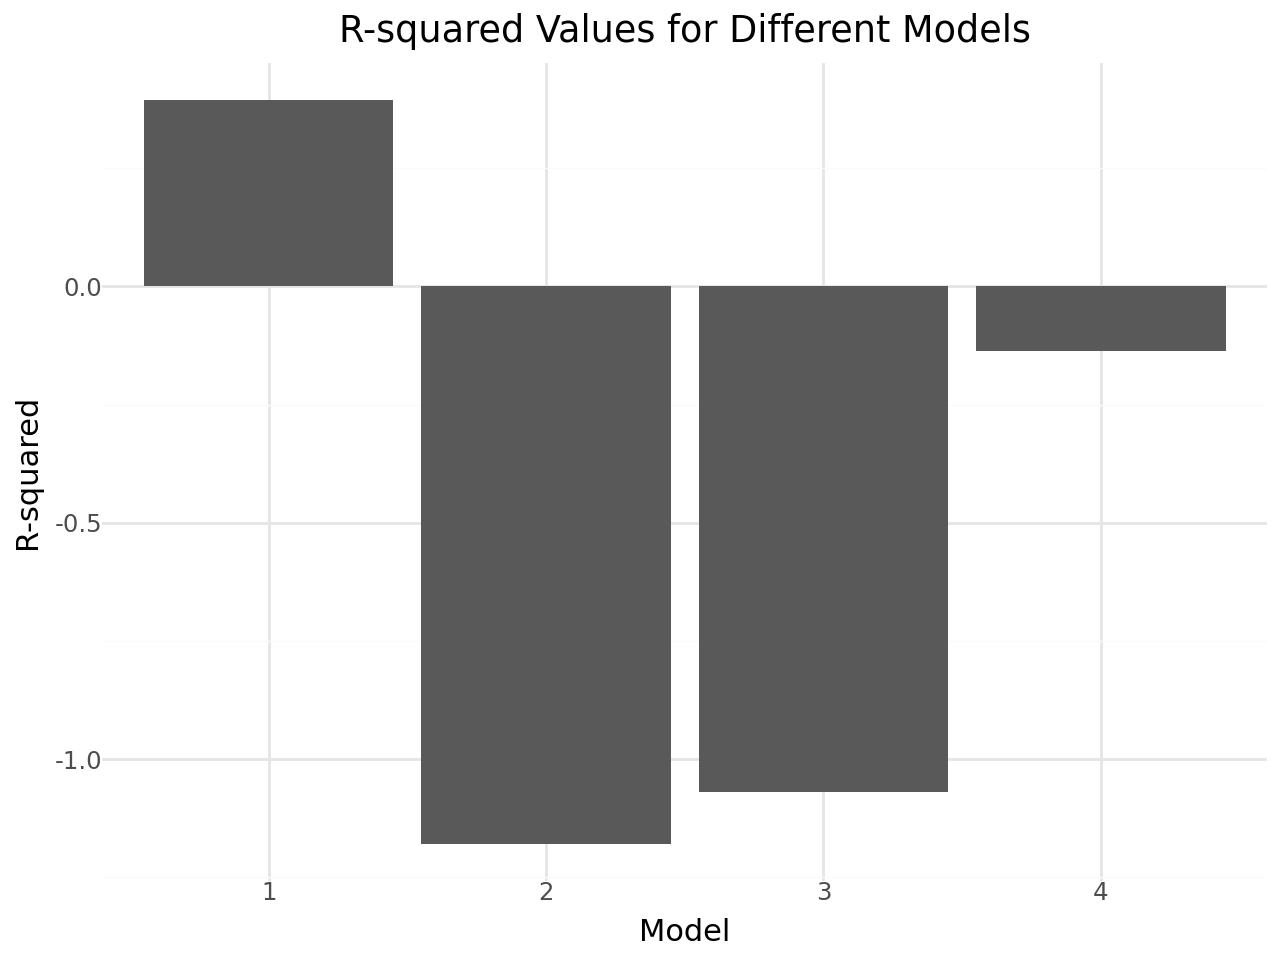

In [76]:

from plotnine import ggplot, aes, geom_col, labs, theme_minimal

(ggplot(df, aes(x='Model', y='R2'))
 + geom_col()
 + labs(title='R-squared Values for Different Models',
        x='Model',
        y='R-squared')
 + theme_minimal()
)

Based on this it appears that linear regression is the best model. None are great but comparatively these are the best
